In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("performance-best.csv", sep=',', header=0, names=['n', 'Elapsed Time', 'FLOPs'], dtype=np.float64)[4:-2]

window = 16
data["FLOPs Avg"] = data["FLOPs"].rolling(window).mean().shift(-int(window/2))

In [3]:
data.head()

,n,Elapsed Time,FLOPs,FLOPs Avg
4,10.0,1.0,6.300000e+09,NaN
5,12.0,2.0,5.400000e+09,NaN
6,14.0,3.0,5.684000e+09,NaN
7,16.0,4.0,6.336000e+09,NaN
8,18.0,10.0,3.596400e+09,NaN


Text(0, 0.5, 'FLOPs')

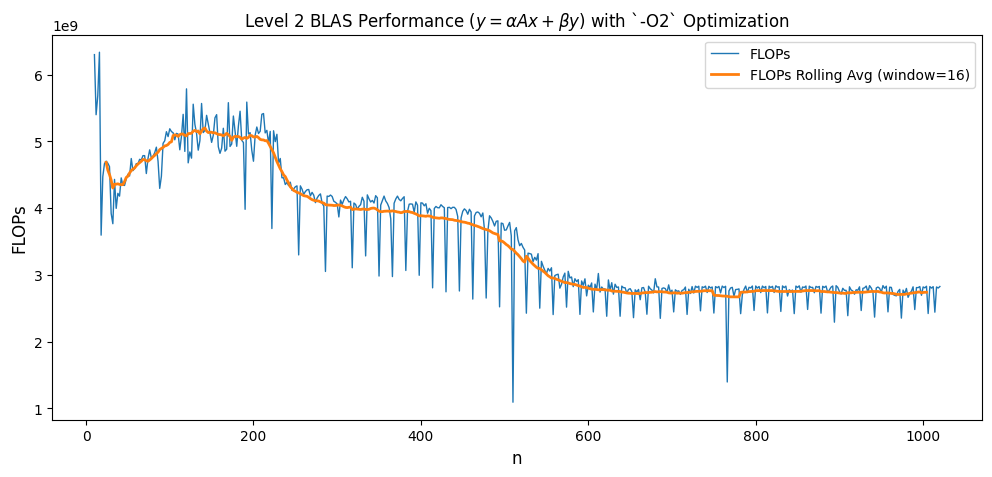

In [4]:
plt.figure(figsize=(12,5))
plt.title(r"Level 2 BLAS Performance ($y=\alpha Ax + \beta y$) with `-O2` Optimization")
sns.lineplot(
    x="n",
    y="FLOPs",
    data=data,
    label="FLOPs",
    linewidth=1,
)
sns.lineplot(
    x="n",
    y="FLOPs Avg",
    data=data,
    label=f"FLOPs Rolling Avg (window={window})",
    linewidth=2,
)
plt.xlabel("n", fontsize=12)
plt.ylabel("FLOPs", fontsize=12)